##  Implementation of K-Nearest Neighbors Algorithm on Wisconsin Breast Cancer Dataset
All credit goes to: https://www.geeksforgeeks.org/ml-kaggle-breast-cancer-wisconsin-diagnosis-using-knn/

Dataset acquired directly from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 

In [78]:
# performing linear algebra 
import numpy as np  
  
# data processing 
import pandas as pd 
  
# visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns

# machine learning
from sklearn.neighbors import KNeighborsClassifier

In [83]:
df = pd.read_csv("data.csv") 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [86]:
df = df.drop(['Unnamed: 32', 'id'], axis = 1) 
print(df.shape) 

(569, 31)


In [87]:
def diagnosis_value(diagnosis): 
    if diagnosis == 'M': 
        return 1
    else: 
        return 0
  
df['diagnosis'] = df['diagnosis'].apply(diagnosis_value) 

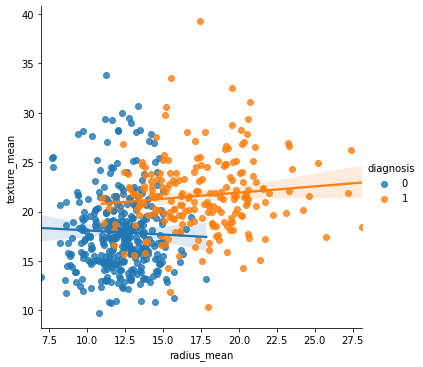

In [88]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df) 

In [89]:
df = df.reset_index()
X = np.array(df.iloc[:, 1:]) 
y = np.array(df['diagnosis']) 

In [93]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.33, random_state = 42) 
print(X_train)

[[ 1.      15.46    11.89    ...  0.1827   0.3216   0.101  ]
 [ 0.      12.85    21.37    ...  0.05601  0.2488   0.08151]
 [ 1.      19.21    18.57    ...  0.2091   0.3537   0.08294]
 ...
 [ 0.      14.29    16.82    ...  0.03333  0.2458   0.0612 ]
 [ 1.      13.98    19.62    ...  0.1827   0.3179   0.1055 ]
 [ 0.      12.18    20.52    ...  0.07431  0.2694   0.06878]]


In [94]:
knn = KNeighborsClassifier(n_neighbors = 13) 
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [95]:
knn.score(X_test, y_test) 

0.9627659574468085

In [96]:
neighbors = [] 
cv_scores = [] 
  
from sklearn.model_selection import cross_val_score 
# perform 10 fold cross validation 
for k in range(1, 51, 2): 
    neighbors.append(k) 
    knn = KNeighborsClassifier(n_neighbors = k) 
    scores = cross_val_score( 
        knn, X_train, y_train, cv = 10, scoring = 'accuracy') 
    cv_scores.append(scores.mean()) 

The optimal number of neighbors is  13 


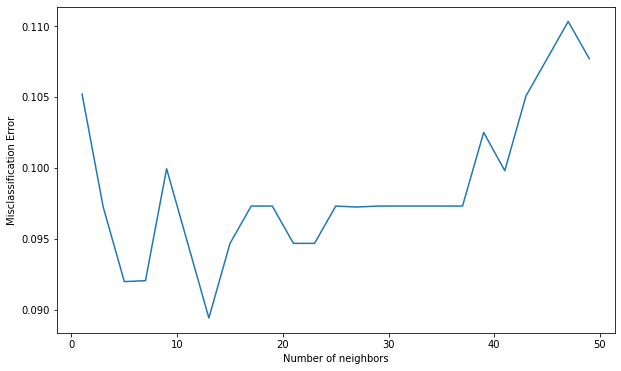

In [97]:
MSE = [1-x for x in cv_scores] 
  
# determining the best k 
optimal_k = neighbors[MSE.index(min(MSE))] 
print('The optimal number of neighbors is % d ' % optimal_k) 
  
# plot misclassification error versus k 
plt.figure(figsize = (10, 6)) 
plt.plot(neighbors, MSE) 
plt.xlabel('Number of neighbors') 
plt.ylabel('Misclassification Error') 
plt.show() 